# Get The Data

In [2]:
import numpy as np 
import pandas as pd 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns 
from subprocess import check_output
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

data_train = pd.read_csv('/floyd/input/fashion-mnist/fashion-mnist_train.csv')
data_test = pd.read_csv('/floyd/input/fashion-mnist/fashion-mnist_test.csv')

/Users/donalbyrne/anaconda/envs/DQN_35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/donalbyrne/anaconda/envs/DQN_35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


# Data Prep

In [3]:
# image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

#Split the target labels and the feature data
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Split the targets and features in the test
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

# reshape the data and convert to floats
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1).astype('float32')

# normalise the data
X_train /= 255
X_test /= 255
X_val /= 255

# Network

In [4]:
#hyperparameters
batch_size = 256
num_classes = 10
epochs = 10

In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2,activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

In [11]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 67s 1ms/step - loss: 0.5400 - acc: 0.8014 - val_loss: 0.4097 - val_acc: 0.8484
Epoch 2/10
48000/48000 [==============================] - 65s 1ms/step - loss: 0.3895 - acc: 0.8588 - val_loss: 0.3365 - val_acc: 0.8763
Epoch 3/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3403 - acc: 0.8748 - val_loss: 0.3065 - val_acc: 0.8876
Epoch 4/10
48000/48000 [==============================] - 61s 1ms/step - loss: 0.3089 - acc: 0.8867 - val_loss: 0.2864 - val_acc: 0.8949
Epoch 5/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.2885 - acc: 0.8934 - val_loss: 0.2729 - val_acc: 0.8993
Epoch 6/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.2704 - acc: 0.9009 - val_loss: 0.2648 - val_acc: 0.9018
Epoch 7/10
48000/48000 [==============================] - 63s 1ms/step - loss: 0.2569 - acc: 0.9052 - val_loss: 0.2522 - val_acc

In [13]:
#get the outputs of our model and see how it did
prediction_list = model.predict_classes(X_test)

y_test = data_test.iloc[:, 0]
correct = np.nonzero(prediction_list==y_test)[0]

print("Accuracy: ",((len(correct)/len(y_test))*100),'%')

Accuracy:  91.8 %


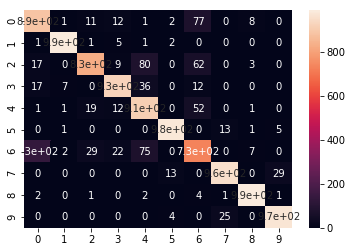

In [16]:
cm = confusion_matrix(y_test, prediction_list)
sns.heatmap(cm,annot=True)
plt.savefig('cm.png')
plt.show()